 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Unsupervised Technique

<a id='Imports'></a>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [1]:
%matplotlib inline

#from colorama import init, Fore, Back, Style
import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle as pickle

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Global Constants 

In [2]:
INVALID_CHARACTERS=["?","#"]

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Common Functions 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> List of common functions to be fine tunned in successive projects based on variour data and learning. Right now, it may not do everything that every hence it needs caution if you copy - paste for different workflow


In [3]:
# Every project should call this function to set the stage for the project
# I need to find out more to do this section - For sure this will go 
# for frequent update
def bootstrap():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 3)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Print Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">We will have many functions this section which can help write text into console

In [4]:
# The project will call print_debug_msg(...) to print all debug logs.
# It is easy to switch off at once. We should find a way to do this
# in a more OOO way like constants/modules/external factor/etc...like 
# log4j configuration available in Java world
def print_debug_msg(*args, **kwargs):
    if (True == True):
        print("****** Start Debugging ******")
        for data in args:
            print(f"{data}", end=' ')
        print(f"\n")
        for key,value in kwargs.items():
            print("%s = %s" % (key, value))
        print("****** End Debugging ******")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will print dataframe with formatting. In future we need to perform more formatting....

In [5]:
def print_df_details(df):
    print("\n****** Start Dataframe Details ******")
    print("Dataframe Shape is ")
    print(df.shape)
    print("Dataframe Info is ")
    print(df.info())
    print("Dataframe random records ")
    display(df.sample(5) if len(df) > 5 else df.sample(1))
    print("****** End Dataframe Details ******\n")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will print model metrics. We will need to add functionality to analyse the metrics and provide report. I basically wanted to check if there is a better way to present this so that metrics are captured separately - may be in a searpate file or something...more thoughts ?

In [6]:
# This function should be enhanced to print more details going forward
def print_metrics(test, labels):
    #print(f"accuracy = {accuracy_score(test, labels)} "
          #f"precision = {precision_score(test, labels, pos_label='Yes')} "
          #f"recall = {recall_score(test, labels, pos_label='Yes')} "
          #f"f1-score = {f1_score(test, labels, pos_label='Yes')}")
    print("classification  Matrix:\n",classification_report(test,labels))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function to print inference. Need to check how to add color, text, manicure, pedicure of the text, etc. This will need enhancement in the same way like print_metrics function

In [7]:
# It prints given value and text. However we need to think more to make sure
# we are able to highlight the importants inference accordingly
def print_inference(value, txt):
    if (type(value) == str):
        print(f"[{value}] {txt}")
    else:
        print(f"{value} {txt}")
    print("\n\n")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">This function will print binary class confusion matrics. For multi-class, we should check whether we should enhance this or something different.

In [8]:
def print_binary_cm(y_test, predicted_labels, index=['NO','YES']):
    cm = metrics.confusion_matrix(y_test, predicted_labels)
    print(y_test.value_counts())
    print(cm)
    cm_df = pd.DataFrame(cm, index = y_test.value_counts())
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, fmt="d", annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Dataframe Functions

## <span style="font-family: Trebuchet MS; font-size:0.7em;color:darkorange;"> Function will read file from 'fqfn' (Fully Qualified File Name) and convert it into data frame. It prints sample data and info on the screen before returing the dataframe.

In [9]:
# Read file and convert it to Dataframe
def file_to_df(fqfn, file_type='csv'):
    df = 'None'
    # We are only handling csv files. How about .dat
    # We are also using "skipinitialspace" parameter so that we 
    # can save some time in preprocessing later (ie, we should do strip)
    if (file_type == 'csv'):
        df = pd.read_csv(fqfn, skipinitialspace = True)
    elif (file_type == 'json'):
        df = pd.read_json(fqfn)
    else:
        raise ValueError('Unsupported filetype ', file_type)
    print_df_details(df)
    return df

## <span style="font-family: Trebuchet MS; font-size:0.7em;color:darkorange;"> Function to merge dataframes. Do we need to handle more than two dataframe - i think it will be a bad practice to collect all dataframe and call for merge. As of today, this function will check common column name to perform merge on the column in the given dataset. If there is nothing common between src_df and dest_df, it will do concat the dataframe with outter join. We will need to do more checks in this function to make it more generalized function to perform inner join, left join, etc.

In [10]:
# Useful to merge/contact two datafrme. Will it be only two DF always
# It is possible to get more df hence the function should support 
# variable arguments with limit or some other better way. If we are to
# support more than two dataframe we should build a logic to find join
# condition across the dataframe.
def merge_df(src_df, dest_df, coumn_wise=0):
    df = None
    df1 = set(src_df.columns)
    df2 = set(dest_df.columns)
    col = list(df1 & df2)
    
    #print(col)
    # We have common column between DF hence
    # merge using column.
    if (len(col) == 1) : # Do column wise merge
        df = src_df.merge(dest_df,on=col[0])
        assert((src_df.columns.size + dest_df.columns.size -1) == df.columns.size)
    elif (coumn_wise == 0):
        df = pd.concat([src_df,dest_df],join='outer',axis=0)
    else:
        #df.reset_index(inplace=True, drop=True)
        df = pd.concat([src_df,dest_df],join='outer',axis=1)
    # print_df_details(df)
    return df

# Few unit testing - we should find a better way to incorporate like 
# production vs test, etc. For now, we are working around using
# comment/uncomment mode.

#s1 = pd.Series(list('abc'))
#s2 = pd.Series(list('def'))
#print_df_details(merge_df(pd.get_dummies(s1), pd.get_dummies(s2)))

#s1 = pd.Series(list('abc'))
#s2 = pd.Series(list('ade'))
#print_df_details(merge_df(pd.get_dummies(s1), pd.get_dummies(s2)))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Analysis and Cleaning Functions


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Functions will help perform data analysis and cleaning. They are analysing from 5-point summary, finding skewness and provide inferences, etc. There will be functions to perform type conversion, imputing values, removing records part of imputation, etc. The encoding functions are also coming under this bucket. Generally Data analysis and Cleaning is a big bucket

In [11]:
# To start with - tried using the formula. However later figured out
# functions like 'skew' in dataframe which provides the skenwess for
# all numeric data. Currently making use of the skew function later
# we need to check if there is a better way to get the skewness.
# Irrespective of that - we should find a better way to convey almost
# normal, slightly left skewed, extreme right skewed, etc.
def find_skeweness(data):
    #Skew = 3 * (Mean – Median) / Standard Deviation
    series = data.skew(axis='index',skipna=True,numeric_only=True)
    # print(series)
    for column in data.select_dtypes(include=[np.number]).columns:
        if (series[column] == float(0)):
            print_inference(column, " is normally distributed")
        elif (series[column] < float(0)):
            print_inference(column, " is left skewed")
        elif (series[column] > float(0)):
            print_inference(column, " is right skewed")

In [12]:
# Trying to analyse five point summary details and tyring for automation
def five_point_summary(data):
    # Summary Data and Index
    sd = None
    si = ['count','unique','top','freq','mean','std','min','25%','50%','75%','max']
    
    # Columns in dataframe
    columns = data.columns
    
    # For now - let us use transposed describtion and print it
    sd = data.describe(include='all').T
    display(sd)
    
    # Number of rows and columns in the dataframe
    nr = data.shape[0]
    nc = data.shape[1]
    
    # Inferences based out of count
    # Do this for all column
    for column in columns:
        if (int(sd[si[0]][column]) != nr):
            print_inference(column, "is having some null or empty row or missing value")
        
    # Inferences based out of unique
    cc = []
    for column in columns:
        if (sd[si[1]][column] >= 2 and sd[si[1]][column] <= 5):
             cc.append(column)
    if (len(cc) > 0):
        print_inference(cc, "can be a category column")
        
    # Inferences based out of top and freq
    # Balanced column or not
    id_c = []
    nm_c = []
    bl_c = []
    imbl_c = []
    tpercent = 15
    for column in columns:
        freq = sd[si[3]][column]
        uv = sd[si[1]][column]
        count = int(sd[si[0]][column])
        top = sd[si[2]][column]
        tval = round(tpercent * count/100)
        print_debug_msg(freq, uv, count, tval, column)
        
        if (math.isnan(freq)):
            nm_c.append(column)
        elif (freq == 1):
            id_c.append(column)
        else:           
            # Freq value should ideally be less than or equal 
            # to (count/unique + tval). We need to check and find
            # more closer formula
            if (freq > abs(((count/uv) + tval))):
                imbl_c.append(column)
            else:
                bl_c.append(column)
                
    if (len(id_c) > 0):
        print_inference(id_c," is an index column - we can drop")
    if (len(nm_c) > 0):
        print_inference(nm_c," is an numeric column")
    if (len(bl_c) > 0):
        print_inference(bl_c," is an blanced column")
    if (len(imbl_c) > 0):
        print_inference(imbl_c," is an imbalanced column")
    
    # Infereance based out of mean, median, etc
    # Skewness
    find_skeweness(data)
#five_point_summary(data)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Data Patching Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> The functions related to converting types, removing row based on column value, changing a column value, dropping column

In [13]:
# Function will help convert list of columns type as Int64. 
# We should add check and balance to make it more complete
def convert_to_int64(columns, df):
    for column in columns:
        df[column] = df[column].astype('int64')
    return df

In [14]:
# Function will help convert list of columns type as 'category'.
# Think - Why python is not having category as type ?
# We should add check and balance to make it more complete 
# like convert_to_int64
def convert_to_category(columns, df):
    for column in columns:
        df = df.astype({column: 'category'})
    return df

In [15]:
# The given set of columns will be dropped from the dataframe
# Caller should get the new dataframe and update it
def drop_column(columns, df):
    return df.drop(columns=columns)

In [16]:
# This function should be enhanced to automatically decide whether given
# dataset needs normalization or it needs standardization. For now it does
# Normalization only
def standardize_or_normalize(df, normalize=True):
    # perform a robust scaler transform of the dataset
    if (normalize == True):
        scaler = MinMaxScaler()
        updated_df = pd.DataFrame(scaler.fit_transform(df),
                           columns = list(df.select_dtypes(include=np.number).columns))
    else:
        updated_df = df.apply(zscore)
    return updated_df

In [17]:
# Function can be used to find all column having NA.
# This will return column name as list if they need to be 
# fixed for NaN
def find_nan(df):
    print(df.isna().sum()/100)
    nan_list = df.columns[df.isna().any()].tolist()
    #print(f"Column {nan_list} is having NaN - To be Fixed")
    return nan_list

In [18]:
def find_invalid_character(df):
    nan_list = []
    for col in df.columns:
        if len(df[df[col].isin(INVALID_CHARACTERS)]) != 0:
            nan_list.append(col)
    return nan_list

In [19]:
# Function to update NaN with Mean. Can we further 
# enhance to do the job automatically like Mean/Median/Mode
# or something else
def replace_nan_with_mean(df, columns):
    for column in columns:
        new_value=df[column].mean()
        df[column].fillna(value=new_value, inplace=True)
    return df

In [20]:
# This function will use SMOTENC to oversample the given
# data. Resampling looks like big subject, hence this 
# function should be optimized to do more in automated way
def do_resample(df, target):
    index = df.columns.get_loc(column)
    X_resampled , Y_resampled = SMOTENC(categorical_features=[index]).fit_resample(df.drop(target,axis=1), df[target])
    return X_resampled, Y_resampled

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Visualization

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Function takes DataFrame as input, finds all categorical variable in it and creates the pie chart for all of them. We may need more configuration parameters to consider like ignore few category feature, etc.

In [21]:
# Iterate through all column in dataframe. Check all categorical column. 
# If they are categorical - apply group by function to generate pie plot
def plot_piechart_for_categorical_type(data):
    total_categorical_column = len(data.select_dtypes(include='category').columns)
    if (total_categorical_column == 1):
        column_in_plot = 1
        rows_in_plot = 1
    else:
        column_in_plot = 3 # Can we fix it?
        rows_in_plot = int(total_categorical_column/column_in_plot) if total_categorical_column % 2 == 0 else int((total_categorical_column/column_in_plot + 1))
    print(f"Total categorical column is {total_categorical_column} and identified rows are {rows_in_plot} "
          f"and identified columns are {column_in_plot}")
    # TODO - Following function call to be optimized for the plot size...
    # That is we need more generlized way of creating plot
    fig, axes = plt.subplots(rows_in_plot,column_in_plot, figsize=(20, 10))
    ax_row,ax_col = 0,0
    if (total_categorical_column == 1):
        column = data.select_dtypes(include='category').columns
        subplt = cat_data = data.groupby(column[0]).size()
        subplt = cat_data.plot(kind='pie', title=column[0], ylabel='', 
                        legend=True, labels=None, autopct='%.2f', textprops={'fontsize': 15})
    else:
        for column in data.columns:
            if (data[column].dtype.name == 'category'):
                print(f"{column} is a category and plotting in {ax_row}{ax_col}")
                print(type(df.groupby(column).size()))
                print(df.groupby(column).size())
                cat_data = data.groupby(column).size()
                print(cat_data)
                subplt=cat_data.plot(kind='pie', title=column, ylabel='', 
                        legend=False, labels=None, autopct='%.2f', textprops={'fontsize': 15}, ax=axes[ax_row,ax_col])
                subplt.legend(cat_data.index, bbox_to_anchor=(0.1, 0.5))
                ax_col += 1
                if (ax_col == column_in_plot):
                    ax_row += 1
                    ax_col = 0
                # If we have odd number of column - we will be left 
                # with one plot unsold, hence remove it
                if (total_categorical_column % 2 != 0):
                    fig.delaxes(axes[ax_row,ax_col])
    plt.tight_layout()
    plt.show()
            

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Heatmap & Correlation

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will create heatmap and analyse weak and strong correlation. We need to automate min and max threshold finding...how..? For now functions below will display heatmap and suggest strong and weak correlation variables.

In [22]:
def __get_correlation_values(data, min_threashold, max_threashold):
    corr_mat = data.corr()
    data = corr_mat.unstack().sort_values()   # Data will be one side of the diagonal 
    corr_set=set()
    for items in data.iteritems():
        if (np.abs(items[1]) > min_threashold and np.abs(items[1]) <= max_threashold):
            if (items[0][0] != items[0][1]):   # Ignore same feature will show always = 1
                not_unique = int(0)
                if (len(corr_set) == 0):
                    corr_set.add(items)
                for item in corr_set:
                    if (item[1] == items[1]):
                        elements = set(item[0]) & set(items[0])
                        if (len(elements) == 2):
                            not_unique = 1;
                if (not_unique == 0):
                    corr_set.add(items)
    return corr_set

In [23]:
def analyse_correlation(data):
    sns.heatmap(data.corr(), cmap="plasma", vmin=-1, vmax=1, annot=True, linewidth=1)
    plt.show()
    corr_set = __get_correlation_values(data.corr(), 0.25, 0.5)
    print("Weakest correlations are ")
    for corr in corr_set:
        print(f"{corr}")
    print("Strong correlations are ")
    corr_set = __get_correlation_values(data.corr(), 0.7, 1.0)
    for corr in corr_set:
        print(f"{corr}")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Histogram 

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Function will create histogram for all numeric data feature with random color

In [24]:
def plot_hist(data):
    # We should get all the columns having category type
    columns = data.select_dtypes(include=[np.number]).columns
    print_debug_msg(columns)
    
    cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Iterate over all the column and plot histograms on the 
    # same axis
    count = 0
    for column in columns:
        plt.hist(df[column], bins=25, alpha=0.45, color=cycle_colors[count])
        count += 1
        plt.legend([column])
        plt.show()

In [25]:
def create_box_plot(data):
    plt.figure(figsize=(17,10))
    sns.boxplot(data=df)
    plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> Pairwise Relationships

In [26]:
# THis function will help understand how each independent 
# variable help understand the relationship with target
# variable.
def plot_pair_relationship(df, target):
    #title = "Numeric column correlation with respect to " + target
    #plt.title(title)
    columns = df.select_dtypes(include=[np.number]).columns
    #plt.figure(figsize=(8,8))
    sns.pairplot(df, hue=target, diag_kind='kde', corner=True)
    #plt.show()

In [27]:
# Function to display count information to determine 
# how the data is spread across categories for all 
# categorical variable.
def category_count_plot(df, target):
    columns = df.select_dtypes(include=['category']).columns  # Column should be category before calling this function
    plt.figure(figsize=(8,5))
    print_debug_msg("count plot", columns)
    for column in columns:
        if (column != target):
            sns.countplot(x=column,data=df, palette='rainbow',hue=target)
            title = "Count of " + column + " Separated by " + target
            plt.title(title)
            plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Model Functions

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Functions are helping in train and test model, etc

In [28]:
# Split given data frame vs Target
def split_xy(target, df):
    X = df.drop(target,axis=1)     
    Y = df[target]
    return X, Y

In [29]:
# Temporary function to prepare dataframe with model metrics
# Useful only in the case of Classification algorithm. The report will be
# something like below,
#
#           Model         accuracy  precision  recall  f1-score support Report
#  0         KNN           0.998     0.998     0.998    0.998    None   Train
#  1         KNN           0.810     0.817     0.810    0.809    None    Test
#  2   LogisticRegression  0.830     0.830     0.830    0.830    None   Train
#  .....................
#  .....................
# 
def getClassificationDashboard(y_data, label, model_name, report='test', portal_df=None):
    index = [] if portal_df == None else list(portal_df.index.values)
    if (len(index) == 0):   # First time
        portal_index = ['Model', 'accuracy', 'precision', 'recall', 'f1-score', 'support', 'Report']
        portal_df = pd.DataFrame(columns=portal_index);
    accuracy = accuracy_score(y_true=y_data, y_pred=label)
    prfs = list(precision_recall_fscore_support(y_true=y_data, y_pred=label, average='weighted'))
    prfs.insert(0, model_name)
    prfs.insert(1, accuracy)
    prfs.insert(6, report)
    pd_series = pd.Series(prfs, index = portal_df.columns)
    portal_df = portal_df.append(pd_series, ignore_index=True)
    return portal_df

In [30]:
# THis function is an attemp to unify the get model function.
# I need to check how we can fine tune automatically for best hyper
# parameters, etc. Today it is another constant function aligned to this
# project :)
def get_model(name, params=None):
    model = None
    if (name == 'SVM'):
        model = svm.SVC();
        
    return model

In [31]:
# Function to be called to evaluate data using SVM
def eval_svm_tunned(X_train, Y_train, X_test, Y_test, report_name='SVM-Tunned'):
    # defining parameter range
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
    grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
    # fitting the model for grid search
    grid.fit(X_train, Y_train)
    pl = grid.predict(X_test)
    # print_binary_cm(Y_test, pl)
    df1 = getClassificationDashboard(Y_train, grid.predict(X_train), report_name, 'Train')
    df2 = getClassificationDashboard(Y_test, grid.predict(X_test), report_name, 'Test')
    
    
    # print best parameter after tuning
    print(grid.best_params_)
 
    # print how our model looks after hyper-parameter tuning
    print(grid.best_estimator_)

    return merge_df(df1, df2, 0)

In [32]:
# Function to be called to evaluate data using SVM
def eval_svm(X_train, Y_train, X_test, Y_test, report_name='SVM'):
    svm_clf = get_model('SVM')
    svm_clf.fit(X_train , Y_train)
    pl = svm_clf.predict(X_test)
    print_binary_cm(Y_test,pl)
    df1 = getClassificationDashboard(Y_train, svm_clf.predict(X_train), report_name, 'Train')
    df2 = getClassificationDashboard(Y_test,svm_clf.predict(X_test), report_name, 'Test')
    return merge_df(df1, df2, 0)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:pink;"> The above eval_**** functions can be combined into a single function. But right now not interested in doing this if - else. Let me find something better and rewrite this again.

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.2em;color:#f98702;"> PART - A - AUTOMOBILE DOMAIN


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> We are given with following CSV file
<a id='csvfiledata'></a>
 
<font color=darkblue> Car name.csv:
    <li> List of Car Name </li>
</font>
<font color=darkblue> Car-Attributes.json:
    <li> JSON  </li>
</font>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Data Understanding & Exploration

#### <font color=darkorange>Read ‘Car name.csv’ as a DataFrame and assign it to a variable.


In [33]:
data1 = file_to_df('Car name.csv')


****** Start Dataframe Details ******
Dataframe Shape is 
(398, 1)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Dataframe random records 


,car_name
111,maxda rx3
254,ford fairmont (auto)
194,amc hornet
252,pontiac phoenix lj
67,mercury marquis


****** End Dataframe Details ******



 
#### <font color=darkorange>Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 


In [34]:
data2 = file_to_df('Car-Attributes.json', 'json')


****** Start Dataframe Details ******
Dataframe Shape is 
(398, 8)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None
Dataframe random records 


,mpg,cyl,disp,hp,wt,acc,yr,origin
358,31.6,4,120.0,74,2635,18.3,81,3
301,34.2,4,105.0,70,2200,13.2,79,1
310,38.1,4,89.0,60,1968,18.8,80,3
345,35.1,4,81.0,60,1760,16.1,81,3
166,13.0,8,302.0,129,3169,12.0,75,1


****** End Dataframe Details ******



### <font color=darkorange>Merge both the DataFrames together to form a single DataFrame

In [35]:
# Pass the col=1 parameter for the internal function to glue two
# dataframe column wise
data = merge_df(data1,data2,1)
print_df_details(data)


****** Start Dataframe Details ******
Dataframe Shape is 
(398, 9)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
Dataframe random records 


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
43,ford country squire (sw),13.0,8,400.0,170,4746,12.0,71,1
272,oldsmobile starfire sx,23.8,4,151.0,85,2855,17.6,78,1
338,plymouth reliant,27.2,4,135.0,84,2490,15.7,81,1
63,pontiac catalina,14.0,8,400.0,175,4385,12.0,72,1
335,triumph tr7 coupe,35.0,4,122.0,88,2500,15.1,80,2


****** End Dataframe Details ******



### <font color=darkorange>Print 5 point summary of the numerical features and share insights


In [36]:
five_point_summary(data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cyl,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
disp,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
hp,398.0,94.0,150.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acc,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0


****** Start Debugging ******
6 305 398 60 car_name 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 mpg 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 cyl 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 disp 

****** End Debugging ******
****** Start Debugging ******
22.0 94.0 398 60 hp 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 wt 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 acc 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 yr 

****** End Debugging ******
****** Start Debugging ******
nan nan 398 60 origin 

****** End Debugging ******
['mpg', 'cyl', 'disp', 'wt', 'acc', 'yr', 'origin']  is an numeric column



['car_name', 'hp']  is an blanced column



[mpg]  is right skewed



[cyl]  is right skewed



[disp]  is right skewed



[wt]  is right skewed



[acc]  is right skewed



[yr]  is right skewed



[origin

In [37]:
# TODO - Move this check inside five_point_summary function
# Maybe we can check the length and suggest something can be 
# as categorical than numbers
print(data['yr'].value_counts())
print(data['origin'].value_counts())

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Feature 'hp' seem to be having some issue as we are not getting mean, etc. </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Origin can be categorical variable - we are not going to convert it for this project. </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> As identified by the five_point_summary() function - all numeric data is skewed right </span>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Data Preparation & Analysis

### <font color=darkorange> Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach 

In [38]:
columns = find_nan(data)
print("Missing values are in ", columns)
if (len(columns) > 0):
    replace_nan_with_mean(data,columns)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64
Missing values are in  []


### <font color=darkorange>Check for duplicate values in the data and impute with the best suitable approach

In [39]:
data[data.duplicated(subset=['car_name','mpg','cyl','disp','hp','wt','acc'], keep=False)]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
18,datsun pl510,27.0,4,97.0,88,2130,14.5,70,3
29,datsun pl510,27.0,4,97.0,88,2130,14.5,71,3


In [40]:
data.drop_duplicates(subset=['car_name','mpg','cyl','disp','hp','wt','acc'], keep='first', inplace=True)
print_df_details(data)


****** Start Dataframe Details ******
Dataframe Shape is 
(397, 9)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  397 non-null    object 
 1   mpg       397 non-null    float64
 2   cyl       397 non-null    int64  
 3   disp      397 non-null    float64
 4   hp        397 non-null    object 
 5   wt        397 non-null    int64  
 6   acc       397 non-null    float64
 7   yr        397 non-null    int64  
 8   origin    397 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 31.0+ KB
None
Dataframe random records 


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
85,buick century 350,13.0,8,350.0,175,4100,13.0,73,1
378,plymouth horizon miser,38.0,4,105.0,63,2125,14.7,82,1
355,honda prelude,33.7,4,107.0,75,2210,14.4,81,3
116,pontiac grand prix,16.0,8,400.0,230,4278,9.5,73,1
122,saab 99le,24.0,4,121.0,110,2660,14.0,73,2


****** End Dataframe Details ******



### <font color=darkorange>Plot a pairplot for all features

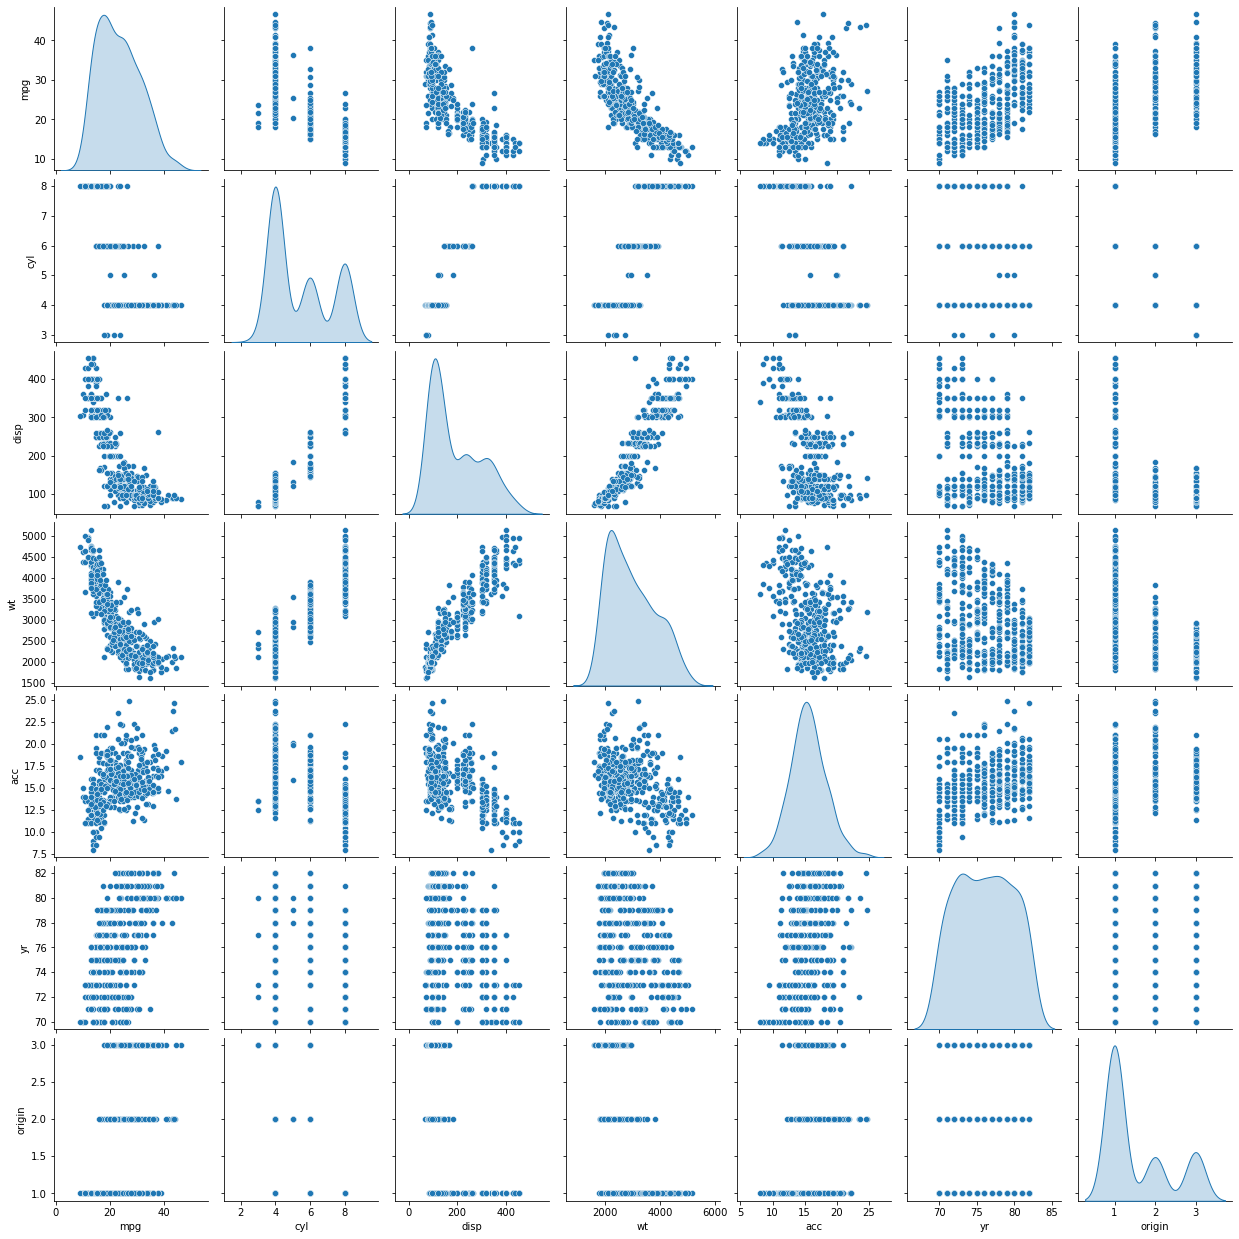

In [41]:
sns.pairplot(data, diag_kind='kde')

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Univaritie graph suggests that we may have three clusters in the given dataset </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Weight and Displacement has negative coorelation with mpg </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Weight and displacement has poitive coorelation


### <font color=darkorange>Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

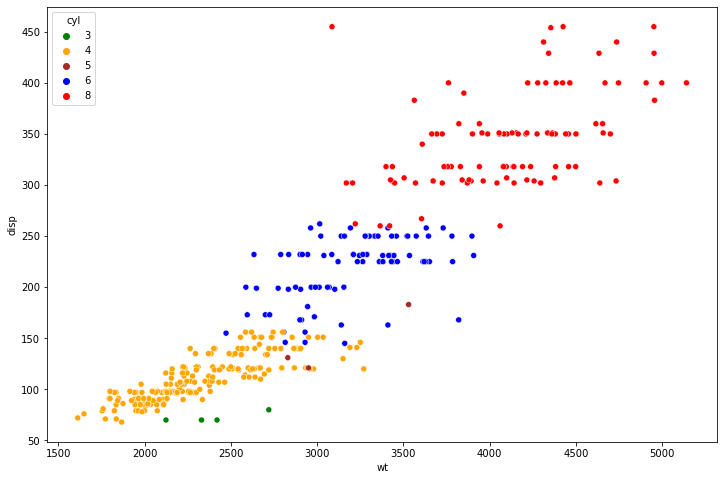

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['wt'],y=data['disp'],hue=data['cyl'],palette=['green','orange','brown','blue','red'])
plt.show()

### <font color=darkorange>Share insights from scatter plot

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> We have less number of 3 and 5 cylinder cars in the dataset </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Four cylinder car weight and displacement is not varying much </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Higher the cylinders - higher the weight of the car and displacement </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> With 8 cylinders car weight vary from 3000 to 5500 with dispalcement vary from 250 450 </span>

### <font color=darkorange>Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

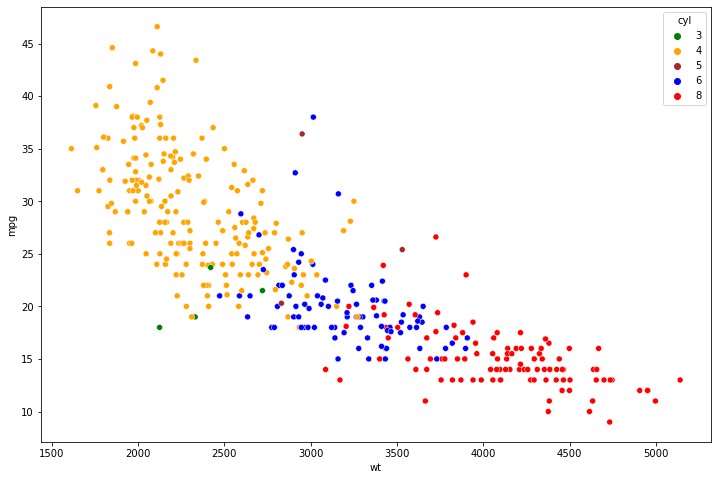

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['wt'],y=data['mpg'],hue=data['cyl'],palette=['green','orange','brown','blue','red'])
plt.show()

### <font color=darkorange>Share insights for Q2.f

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> Hight cylinder cars are having higher weight and giving less mpg </font>

### <font color=darkorange>Check for unexpected values in all the features and datapoints with such values

In [44]:
columns = find_invalid_character(data)
print(f"Column having {INVALID_CHARACTERS} are in {columns}")
if (len(columns) > 0):
    for column in columns:
        for character in INVALID_CHARACTERS:
            data[column].replace(character, np.nan, inplace=True)
columns = find_nan(data)
replace_nan_with_mean(data,columns)
df = data.copy()
df.info()

Column having ['?', '#'] are in ['hp']
car_name    0.00
mpg         0.00
cyl         0.00
disp        0.00
hp          0.06
wt          0.00
acc         0.00
yr          0.00
origin      0.00
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  397 non-null    object 
 1   mpg       397 non-null    float64
 2   cyl       397 non-null    int64  
 3   disp      397 non-null    float64
 4   hp        397 non-null    float64
 5   wt        397 non-null    int64  
 6   acc       397 non-null    float64
 7   yr        397 non-null    int64  
 8   origin    397 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 47.2+ KB


# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Clustering

### <font color=darkorange> Apply K-Means clustering for 2 to 10 clusters.


In [45]:
from scipy.stats import zscore

dataAttr=df.iloc[:,1:]
dataAttrScaled=dataAttr.apply(zscore)

#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataAttrScaled)
    prediction=model.predict(dataAttrScaled)
    meanDistortions.append(sum(np.min(cdist(dataAttrScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataAttrScaled.shape[0])

### <font color=darkorange> Plot a visual and find elbow point. 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

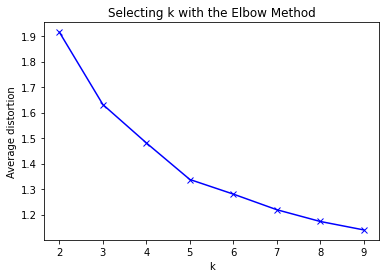

In [46]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### <font color=darkorange> On the above visual, highlight which are the possible Elbow points. 

### <font color=darkblue> There are two cuts one at 3 and another one 5. </font>
### <font color=darkblue> Change N_CLUSTER to 5 to experiement for 5 clusters.

### <font color=darkorange> Train a K-means clustering model once again on the optimal number of clusters.

In [47]:
N_CLUSTER = 3
dataAttr.drop(['GROUP'], axis=1, errors='ignore', inplace=True)
dataAttr.drop(["Label"], axis=1, errors='ignore', inplace=True)
dataAttrScaled.drop(['GROUP'], axis=1, errors='ignore', inplace=True)

final_model=KMeans(N_CLUSTER)
final_model.fit(dataAttrScaled)
#print(dataAttrScaled)
prediction=final_model.predict(dataAttrScaled)
#print(prediction)
#Append the prediction

dataAttr["GROUP"] = prediction
dataAttrScaled["GROUP"] = prediction

In [48]:
print("Groups Assigned : \n")
dataAttr.sample(10)
dataAttrScaled.sample(10)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
338,0.472766,-0.858191,-0.563271,-0.537088,-0.570523,0.046867,1.349219,-0.712618,1
50,0.575146,-0.858191,-0.745688,-0.379980,-1.004438,-0.569708,-1.361509,0.539193,2
134,-0.960554,0.318672,0.617636,0.143715,0.779697,0.881056,-0.548291,-0.712618,1
47,-0.576629,0.318672,0.540829,-0.118133,0.365882,-0.207017,-1.361509,-0.712618,1
392,0.447171,-0.858191,-0.409657,-0.379980,-0.026652,0.627173,1.620292,-0.712618,1
253,-0.384667,0.318672,0.060785,-0.249056,0.215726,0.953595,0.536000,-0.712618,1
54,1.470972,-0.858191,-1.168126,-0.929859,-1.607426,0.881056,-1.361509,1.791005,2
281,-0.474249,0.318672,0.060785,-0.510903,0.020642,0.953595,0.807073,-0.712618,1
367,0.575146,-0.858191,-0.784092,-0.432349,-0.434555,1.461362,1.620292,-0.712618,1
199,-0.448654,0.318672,0.300807,-0.118133,0.802161,0.772249,-0.006145,-0.712618,1


### <font color=darkorange>Add a new feature in the DataFrame which will have labels based upon cluster value.

In [49]:
#print(type())
dataAttrScaled.groupby(['GROUP']).mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,-1.125002,1.483767,1.466065,1.467352,1.364844,-1.033590,-0.616059,-0.712618
1,-0.231657,-0.128021,-0.058665,-0.243313,0.021660,0.435767,0.078936,-0.602971
2,0.901483,-0.817737,-0.866059,-0.708758,-0.871574,0.272869,0.317448,0.961680


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

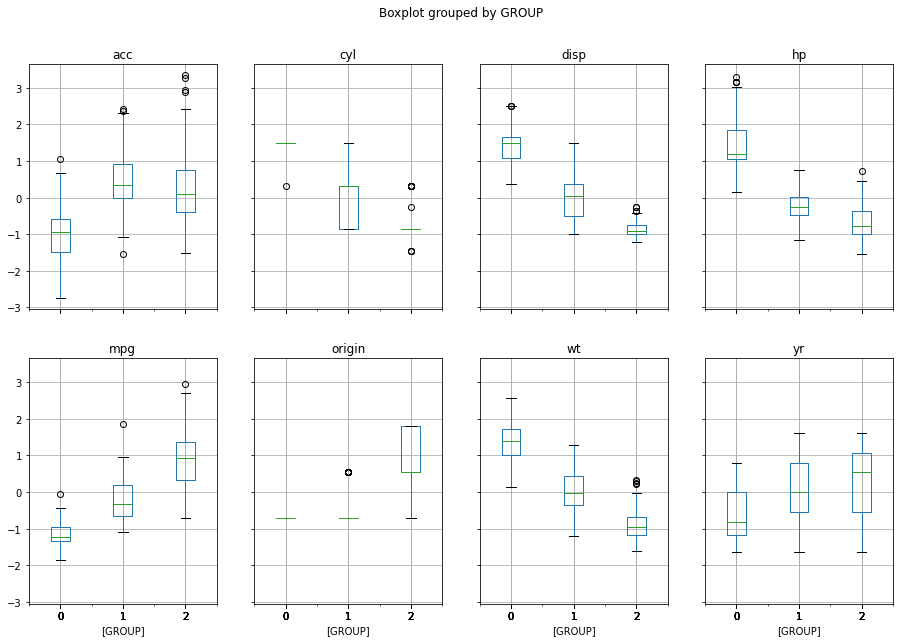

In [50]:
dataAttrScaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

### <font color=darkblue> We will need some outlier treatment on the data


In [51]:
cluster = []
for record in dataAttr['GROUP']:
    if record == 0 :
        cluster.append('A')
    elif record == 1 :
        cluster.append('B')
    elif record == 2 :
        cluster.append('C')
    elif record == 3 :
        cluster.append('D')
    elif record == 4 :
        cluster.append('E')    
    else:    
        cluster.append('X')
dataAttr.drop(["Label"], axis=1, errors='ignore')
dataAttr['Label'] = cluster
dataAttr.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP,Label
288,18.2,8,318.0,135.0,3830,15.2,79,1,0,A
286,17.6,8,302.0,129.0,3725,13.4,79,1,0,A
296,27.4,4,121.0,80.0,2670,15.0,79,1,1,B
182,28.0,4,107.0,86.0,2464,15.5,76,2,2,C
329,44.6,4,91.0,67.0,1850,13.8,80,3,2,C
297,25.4,5,183.0,77.0,3530,20.1,79,2,1,B
102,26.0,4,97.0,46.0,1950,21.0,73,2,2,C
327,36.4,5,121.0,67.0,2950,19.9,80,2,2,C
60,20.0,4,140.0,90.0,2408,19.5,72,1,1,B
70,13.0,8,400.0,190.0,4422,12.5,72,1,0,A


### <font color=darkorange>Plot a visual and color the datapoints based upon clusters.

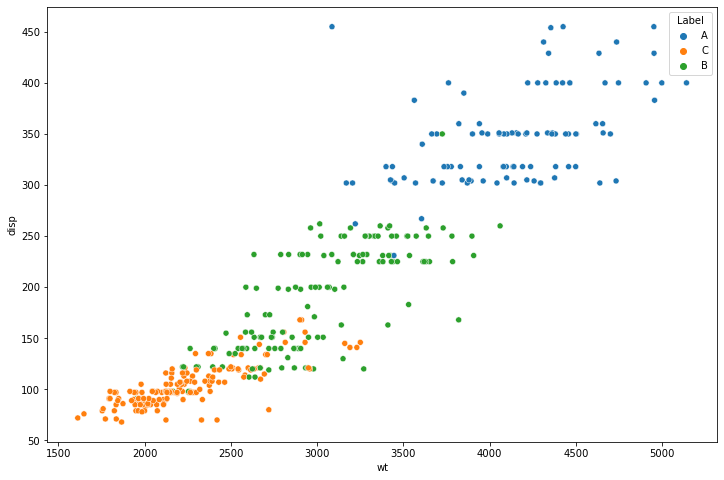

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataAttr['wt'],y=dataAttr['disp'],hue=dataAttr['Label'])
plt.show()

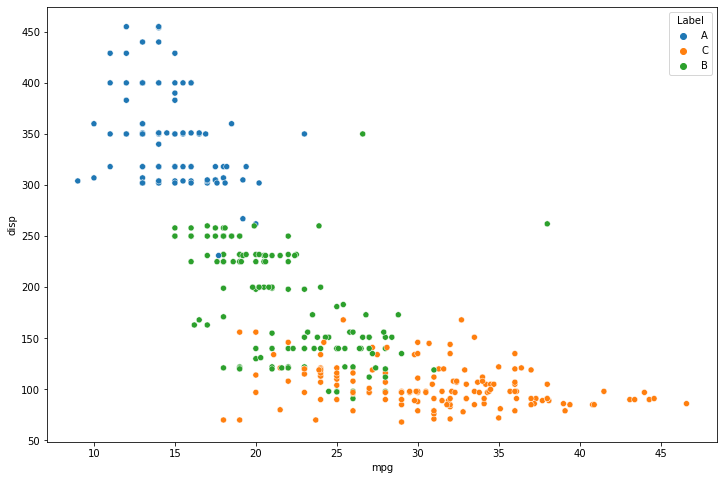

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataAttr['mpg'], y=dataAttr['disp'], hue=dataAttr['Label'])
plt.show()

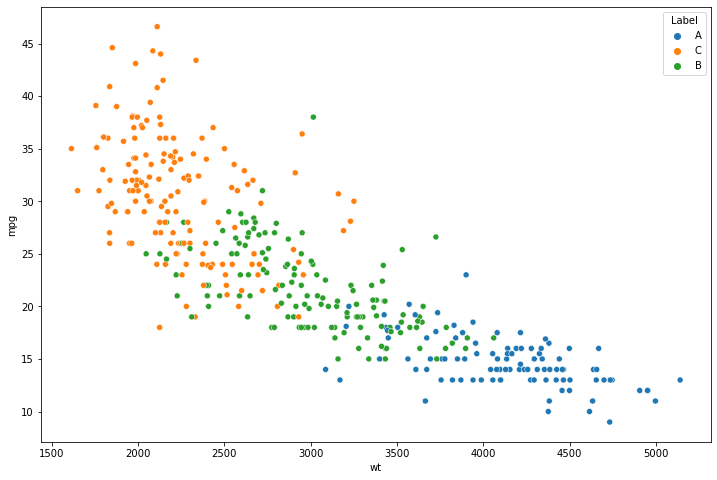

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataAttr['wt'],y=dataAttr['mpg'],hue=dataAttr['Label'])
plt.show()

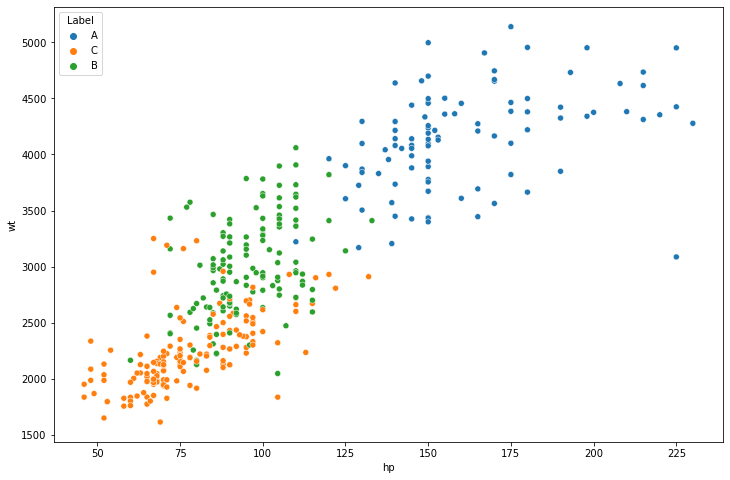

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataAttr['hp'], y=dataAttr['wt'], hue=dataAttr['Label'])
plt.show()

### <font color=darkorange> Pass a new DataPoint and predict which cluster it belongs to. 

In [56]:
columns=['mpg','cyl','disp','hp','wt','acc','yr','origin']
new_vector=[[12.1,   6,   10.0,   10.000000,  2587,  16.1,  60,       3],
            [14.0,    8,  340.0,  160.000000,  3609,   8.0, 70,       1],
            [21.0,    6,  200.0,   85.000000,  2587,  16.0,  70,       1],
            [27.0,    4,   97.0,   88.000000,  2130,  14.5,  70,       3],
            [11.0,    8,  318.0,  210.000000,  4382,  13.5,  70,       1 ],
            [25.0,    4,  113.0,   95.000000,  2228,  14.0,  71,       3]]
test_df = pd.DataFrame(new_vector, columns=columns)
print(test_df.head())
print()
test_df_scaled = test_df.apply(zscore)
#print(test_df_scaled.to_string())
new_prediction = final_model.predict(test_df_scaled)
test_df["Clusters"] = new_prediction
print("With clusters")
print()
print(test_df.to_string())

    mpg  cyl   disp     hp    wt   acc  yr  origin
0  12.1    6   10.0   10.0  2587  16.1  60       3
1  14.0    8  340.0  160.0  3609   8.0  70       1
2  21.0    6  200.0   85.0  2587  16.0  70       1
3  27.0    4   97.0   88.0  2130  14.5  70       3
4  11.0    8  318.0  210.0  4382  13.5  70       1

With clusters

    mpg  cyl   disp     hp    wt   acc  yr  origin  Clusters
0  12.1    6   10.0   10.0  2587  16.1  60       3         2
1  14.0    8  340.0  160.0  3609   8.0  70       1         0
2  21.0    6  200.0   85.0  2587  16.0  70       1         1
3  27.0    4   97.0   88.0  2130  14.5  70       3         2
4  11.0    8  318.0  210.0  4382  13.5  70       1         0
5  25.0    4  113.0   95.0  2228  14.0  71       3         2


<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.2em;color:#f98702;"> PART - B - Automobile


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:#00b3e5;"> We are given with following CSV file
<a id='csvfiledata'></a>
<font color=darkblue> vechile.csv:
    <li> Silhouette details of various class of vehicles such car, bus and van </li>
</font>


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Data Understanding & Cleaning

#### <font color=darkorange>Read ‘vechicle.csv’ as a DataFrame and assign it to a variable.

In [57]:
vdata = file_to_df('vehicle.csv')


****** Start Dataframe Details ******
Dataframe Shape is 
(846, 19)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    flo

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
465,82,43.0,71.0,154.0,68.0,7,150.0,45.0,19.0,143,171.0,330.0,173.0,78.0,7.0,11.0,181.0,186,bus
702,96,48.0,83.0,177.0,59.0,8,171.0,39.0,21.0,152,195.0,438.0,196.0,67.0,15.0,0.0,195.0,201,car
347,88,44.0,77.0,167.0,59.0,6,151.0,44.0,19.0,145,175.0,343.0,177.0,64.0,9.0,12.0,202.0,208,car
160,82,38.0,53.0,125.0,59.0,5,133.0,51.0,18.0,128,152.0,259.0,146.0,87.0,0.0,0.0,177.0,183,car
162,98,39.0,81.0,191.0,64.0,9,166.0,40.0,20.0,138,184.0,415.0,131.0,62.0,8.0,19.0,197.0,205,car


****** End Dataframe Details ******



## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Check percentage of missing values and impute with correct approach.

In [58]:
nacol = find_nan(vdata)
five_point_summary(vdata)

compactness                    0.00
circularity                    0.05
distance_circularity           0.04
radius_ratio                   0.06
pr.axis_aspect_ratio           0.02
max.length_aspect_ratio        0.00
scatter_ratio                  0.01
elongatedness                  0.01
pr.axis_rectangularity         0.03
max.length_rectangularity      0.00
scaled_variance                0.03
scaled_variance.1              0.02
scaled_radius_of_gyration      0.02
scaled_radius_of_gyration.1    0.04
skewness_about                 0.06
skewness_about.1               0.01
skewness_about.2               0.01
hollows_ratio                  0.00
class                          0.00
dtype: float64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846.0,NaN,NaN,NaN,93.678487,8.234474,73.0,87.0,93.0,100.0,119.0
circularity,841.0,NaN,NaN,NaN,44.828775,6.152172,33.0,40.0,44.0,49.0,59.0
distance_circularity,842.0,NaN,NaN,NaN,82.110451,15.778292,40.0,70.0,80.0,98.0,112.0
radius_ratio,840.0,NaN,NaN,NaN,168.888095,33.520198,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,NaN,NaN,NaN,61.67891,7.891463,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,846.0,NaN,NaN,NaN,8.567376,4.601217,2.0,7.0,8.0,10.0,55.0
scatter_ratio,845.0,NaN,NaN,NaN,168.901775,33.214848,112.0,147.0,157.0,198.0,265.0
elongatedness,845.0,NaN,NaN,NaN,40.933728,7.816186,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,843.0,NaN,NaN,NaN,20.582444,2.592933,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,846.0,NaN,NaN,NaN,147.998818,14.515652,118.0,137.0,146.0,159.0,188.0


[circularity] is having some null or empty row or missing value



[distance_circularity] is having some null or empty row or missing value



[radius_ratio] is having some null or empty row or missing value



[pr.axis_aspect_ratio] is having some null or empty row or missing value



[scatter_ratio] is having some null or empty row or missing value



[elongatedness] is having some null or empty row or missing value



[pr.axis_rectangularity] is having some null or empty row or missing value



[scaled_variance] is having some null or empty row or missing value



[scaled_variance.1] is having some null or empty row or missing value



[scaled_radius_of_gyration] is having some null or empty row or missing value



[scaled_radius_of_gyration.1] is having some null or empty row or missing value



[skewness_about] is having some null or empty row or missing value



[skewness_about.1] is having some null or empty row or missing value



[skewness_about.2] is having some null or empty

In [59]:
vdata = convert_to_category(['class'],vdata)

In [60]:
df = replace_nan_with_mean(vdata, nacol)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> We did replace the missing value with its feature mean. The change looks good as none of the feature mean and std are not changed after the imputation

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Visualize a Pie-chart and print percentage of values for variable ‘class’. 

Total categorical column is 1 and identified rows are 1 and identified columns are 1


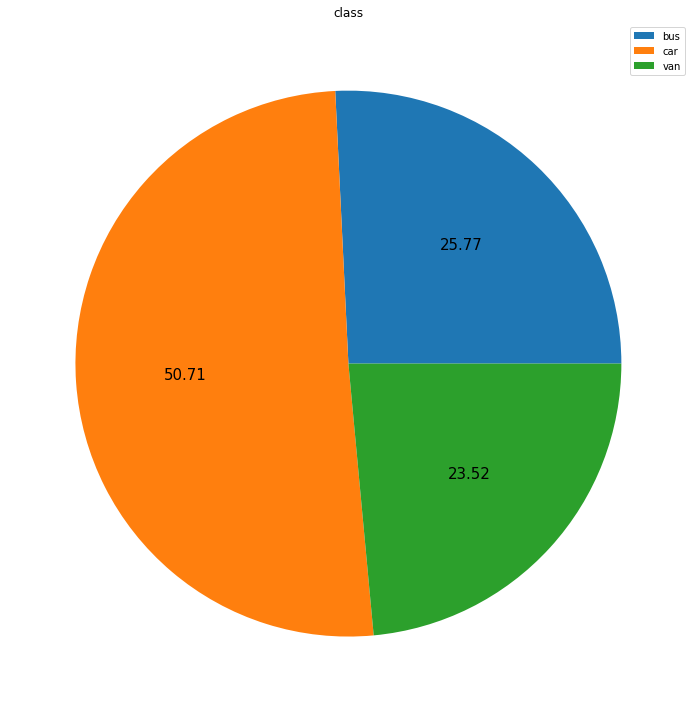

In [61]:
plot_piechart_for_categorical_type(vdata)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Check for duplicate rows in the data and impute with correct approach.

In [62]:
columns_for_duplicate_check=['compactness','circularity','distance_circularity','radius_ratio','scatter_ratio',
                             'elongatedness']
# 'scaled_variance.1', 'skewness_about.1','skewness_about.2','scaled_radius_of_gyration.1'
# 'scaled_variance', 'scaled_radius_of_gyration', 'skewness_about', 'hollows_ratio'
# 'pr.axis_aspect_ratio','max.length_aspect_ratio','pr.axis_rectangularity', 'max.length_rectangularity'
vdata[vdata.duplicated(subset=columns_for_duplicate_check, keep=False)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
137,87,42.0,64.0,150.0,64.0,10,133.0,50.0,18.0,142,157.0,264.0,159.0,67.0,7.0,1.0,193.0,201,van
399,87,42.0,64.0,150.0,64.0,10,133.0,50.0,18.0,141,157.0,265.0,159.0,67.0,7.0,0.0,193.0,201,van


### <font color=darkblue> Sounds like dataset with no duplicates

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Data Preparation

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Split data into X and Y. 

In [63]:
X, Y = split_xy('class', vdata)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Standardize the Data

In [64]:
X_resampled = standardize_or_normalize(X, False)
X_resampled.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
11,-0.446982,-1.766430,-1.024082,-0.985227,-0.847851,-0.558308,-1.383602,1.673674,-1.384896,-2.067876,-1.296599,-1.221945,-1.743467,-0.997817,-0.278411,1.501049,1.151572,0.856507
755,-0.933032,-0.950811,-1.532613,-1.314754,-0.847851,-0.775770,-1.564458,2.057947,-1.384896,-0.964965,-1.551891,-1.335353,-0.821156,-0.461914,0.129731,-0.739719,0.175729,-0.219572
206,-0.203957,0.191055,-0.197720,0.213051,0.294650,-0.123383,-0.208038,0.008489,-0.225160,0.069013,-0.179696,-0.246630,0.101156,-0.729866,-0.890625,-0.291565,0.338369,0.318467
76,-0.325470,-0.950811,0.056545,0.033309,-0.213128,-0.123383,0.093389,-0.375785,0.161418,-0.964965,0.267065,0.031221,-0.698181,-0.059987,-1.298768,-0.291565,-0.149552,-0.219572
473,1.618730,1.822292,1.455005,0.991932,-0.086184,0.529004,1.570379,-1.400514,1.707733,2.136971,1.447791,1.618942,1.146442,-0.059987,1.762301,-1.299910,0.013088,0.049447


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Model Building

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Train a base Classification model using SVM 

car    79
bus    50
van    41
Name: class, dtype: int64
[[49  0  1]
 [ 0 77  2]
 [ 0  5 36]]


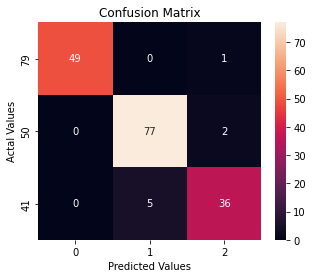

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y, test_size=.2, random_state=31)
rep_df = eval_svm(X_train, Y_train, X_test, Y_test)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Print Classification metrics for train data

In [66]:
print(rep_df.to_string())

  Model  accuracy  precision    recall  f1-score support Report
0   SVM  0.973373   0.973651  0.973373  0.973464    None  Train
0   SVM  0.952941   0.953112  0.952941  0.952707    None   Test


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Apply PCA on the data with 10 components

In [67]:
pca = PCA(n_components=10)  
pca.fit(X_resampled)

PCA(n_components=10)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Visualize Cumulative Variance Explained with Number of Components.

           0         1         2         3         4         5         6         7         8         9
0   0.275259 -0.127011 -0.119874  0.078311  0.069306  0.144650  0.453756 -0.564714 -0.483554 -0.261222
1   0.293392  0.126217 -0.025184  0.187526 -0.085019 -0.300733 -0.248093 -0.179295 -0.014540  0.097543
2   0.304556 -0.072686 -0.056006 -0.070796  0.040724 -0.138488  0.072799  0.436047 -0.167574 -0.208495
3   0.267593 -0.189635  0.275066 -0.042257 -0.046016  0.248791 -0.176254  0.102843 -0.229284 -0.046764
4   0.080494 -0.122159  0.642046  0.032858 -0.040594  0.237891 -0.397139 -0.070004 -0.278147  0.106402
5   0.097220  0.010728  0.591800  0.031320  0.213612 -0.421019  0.501943  0.161399  0.148444 -0.117006
6   0.316872  0.048047 -0.097653 -0.095981 -0.014997  0.116501  0.065136  0.101509  0.054026  0.167989
7  -0.314042  0.012799  0.057465  0.082738  0.076801 -0.142364  0.013830 -0.217059 -0.157329 -0.152974
8   0.313953  0.060035 -0.109509 -0.092271  0.001500  0.096656  0.096825 

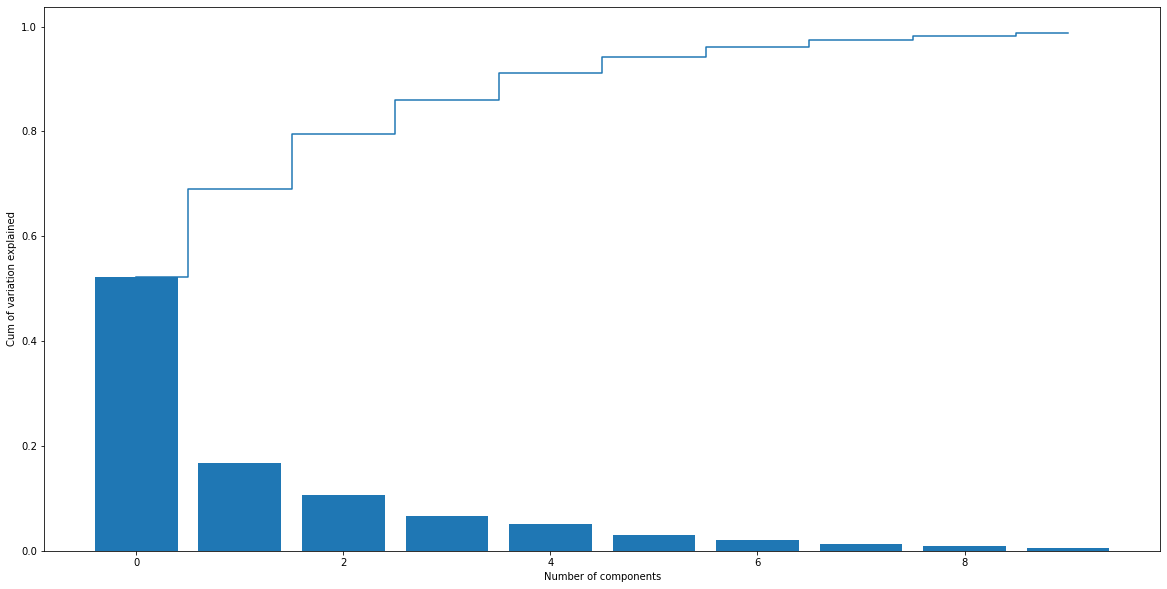

In [68]:
print(pd.DataFrame(pca.components_).T.to_string(), end='\n\n')
print(pca.explained_variance_ratio_)
cum_evr = np.cumsum(pca.explained_variance_ratio_)
print(f"Explained Variance is {pca.explained_variance_} \n"
      f"Cumulative explained variance is {cum_evr}")

plt.figure(figsize=(20 , 10))
plt.bar(range(0,10), pca.explained_variance_ratio_, align='center')
plt.step(range(0,10), cum_evr, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Number of components')
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Draw a horizontal line on the above plot to highlight the threshold of 90%.

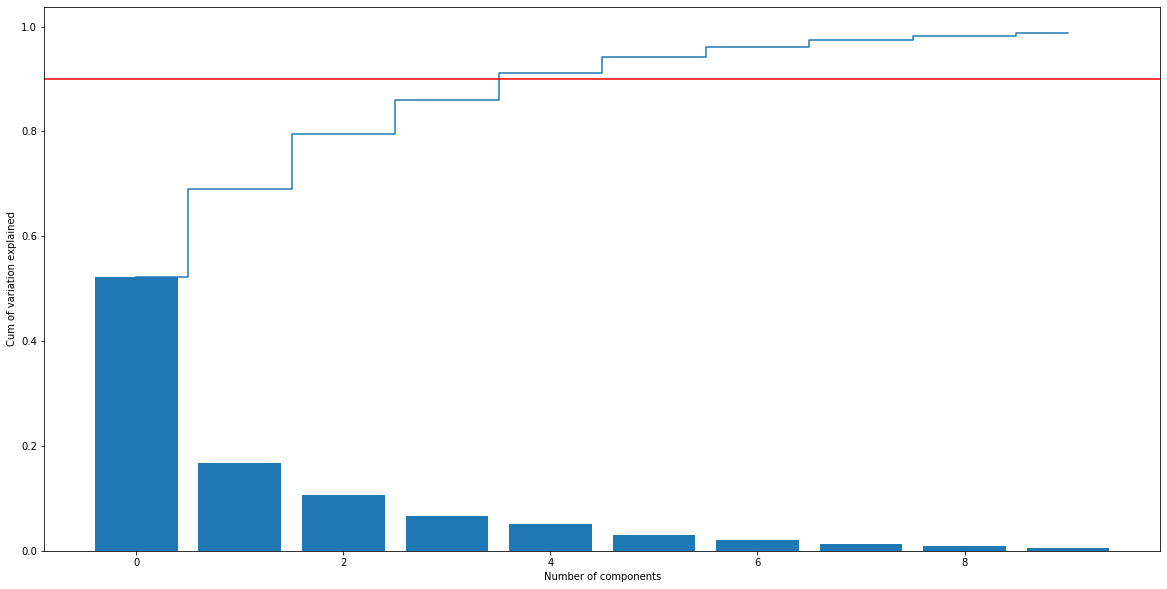

In [69]:
plt.figure(figsize=(20 , 10))
plt.bar(range(0,10), pca.explained_variance_ratio_, align='center')
plt.step(range(0,10), cum_evr, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Number of components')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [70]:
pca = PCA(0.90).fit(X_resampled)  # here you can notice we are specifying 7 PC components in the parameter called n_components
#print(pca)
print(pca.n_components_)
print(pca.explained_variance_ratio_)
pca.n_features_
pca_data = pca.transform(X_resampled)
pca_data_df = pd.DataFrame(pca_data,columns=X_resampled.columns[0:pca.n_components_])
#print(type(pca_data))
#print(pca_data[0])
#pca_data_df = pd.DataFrame(pca_data,columns=X_resampled.columns[0:10])
#print(pca_data_df.info())
#pca_data_df.drop(pca_data_df.iloc[:, 6:10], inplace = True, axis = 1)
print_df_details(pca_data_df)

5
[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389]

****** Start Dataframe Details ******
Dataframe Shape is 
(846, 5)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compactness           846 non-null    float64
 1   circularity           846 non-null    float64
 2   distance_circularity  846 non-null    float64
 3   radius_ratio          846 non-null    float64
 4   pr.axis_aspect_ratio  846 non-null    float64
dtypes: float64(5)
memory usage: 33.2 KB
None
Dataframe random records 


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio
833,-0.508889,0.785270,-0.933988,1.090485,-0.036102
668,0.335953,-0.946846,0.817099,0.946336,1.836485
709,0.695080,-1.728142,0.265975,-2.284142,0.194962
685,-2.683228,2.926596,-0.538156,0.583325,0.693599
288,2.680853,0.312349,0.801478,0.055490,-0.592565


****** End Dataframe Details ******



## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Train SVM model on components selected from above step

car    79
bus    50
van    41
Name: class, dtype: int64
[[30 10 10]
 [ 3 69  7]
 [ 1 14 26]]


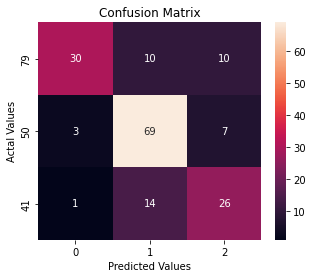

In [71]:
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(pca_data_df, Y, test_size=.2, random_state=31)
rep_df_2 = eval_svm(X_pca_train, Y_pca_train, X_pca_test, Y_pca_test, "SVM-PCA-5PCA")

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Print Classification metrics for train data of above model and share insights

In [72]:
rep_df_3 = merge_df(rep_df, rep_df_2, 0)
rep_df_3

,Model,accuracy,precision,recall,f1-score,support,Report
0,SVM,0.973373,0.973651,0.973373,0.973464,None,Train
0,SVM,0.952941,0.953112,0.952941,0.952707,None,Test
0,SVM-PCA-5PCA,0.798817,0.806920,0.798817,0.797461,None,Train
0,SVM-PCA-5PCA,0.735294,0.750125,0.735294,0.732229,None,Test


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> With 90% or above variance and using only  compactness, circularity, distance_circularity, radius_ratio and pr.axis_aspect_ratio we are able to get 80% accuracy on the train data. This is less than 22% from the original data set.

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Performance Improvement

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [73]:
print(f"{X_pca_train.shape} {X_pca_test.shape} {Y_pca_train.shape} {Y_pca_test.shape}")
rep_df_4 = eval_svm_tunned(X_pca_train, Y_pca_train, X_pca_test,  Y_pca_test, "SVM-Tunned-5PCA")
rep_df_5 = merge_df(rep_df_3, rep_df_4,0)

(676, 5) (170, 5) (676,) (170,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.515 total time=   0.0s
[CV 2/5] END ..

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END ....C=1000, gam

In [74]:
pca = PCA(n_components = 10).fit(X_resampled)  # here you can notice we are specifying 7 PC components in the parameter called n_components
print(pca.n_components_)
print(pca.components_)
pca_data_full = pca.transform(X_resampled)
pca_data_df_full = pd.DataFrame(pca_data_full,columns=X_resampled.columns[0:pca.n_components_])
print_df_details(pca_data_df_full)
X_pca_train_full, X_pca_test_full, Y_pca_train_full, Y_pca_test_full = train_test_split(pca_data_df_full, Y, test_size=.2, random_state=31)
rep_df_6 = eval_svm_tunned(X_pca_train_full, Y_pca_train_full, X_pca_test_full, Y_pca_test_full, "SVM-Tunned-10PCA")
rep_df_7 = merge_df(rep_df_5, rep_df_6,0)

10
[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity
530,0.946218,-0.614872,-0.503401,0.741883,0.868415,-0.257269,-0.922049,0.691824,0.744242,-0.081831
768,2.077584,0.572309,0.338528,-0.287443,-0.607440,0.675305,-0.179784,1.308604,0.104712,-0.306813
542,-0.710800,-2.579900,-0.301082,-0.757596,0.123947,0.323890,0.683698,0.699352,0.232507,0.214513
200,-0.242575,0.657612,0.712347,0.217294,0.453004,-1.039786,-0.369818,-0.088037,-0.769833,0.105600
703,-1.605440,-3.350350,-0.107785,2.077074,1.192236,-0.337826,-0.490437,-0.389842,0.502948,0.062327


****** End Dataframe Details ******

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.515 total time=   0.0s
[CV 2/5] E

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.948 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.978 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.897 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Share best Parameters observed from above step

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> The Best SVM Parameter PCA components having 90% or above variance is {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}. This increase the accuracy on the train data by 7% </span>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. 

In [75]:
rep_df_7

,Model,accuracy,precision,recall,f1-score,support,Report
0,SVM,0.973373,0.973651,0.973373,0.973464,None,Train
0,SVM,0.952941,0.953112,0.952941,0.952707,None,Test
0,SVM-PCA-5PCA,0.798817,0.806920,0.798817,0.797461,None,Train
0,SVM-PCA-5PCA,0.735294,0.750125,0.735294,0.732229,None,Test
0,SVM-Tunned-5PCA,0.869822,0.869601,0.869822,0.869504,None,Train
0,SVM-Tunned-5PCA,0.782353,0.784805,0.782353,0.780603,None,Test
0,SVM-Tunned-10PCA,0.979290,0.979511,0.979290,0.979345,None,Train
0,SVM-Tunned-10PCA,0.947059,0.947391,0.947059,0.947093,None,Test


### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;">  The Best SVM Parameter on the original PCA components with SVM tunned with parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}. This increase the accuracy on the training set than any other other model. We are able to get better performance with less number of feature/component itself.

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.4em;color:#00b3e5;"> Data Understanding & Cleaning

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Explain pre-requisite/assumptions of PCA.

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> We should convert features to numeric and should standarize the data before applying PCA </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> It assumes that linearity amoong the feature in a given dataset </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> It assumes there are no (or very less) outliers in the dataset </span>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">Explain advantages and limitations of PCA.

### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;">  Helps to fix curse of dimensionality thus increase computational speed of the model, reduce storage capacity. The reduced dataset can be visualy represented.</span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> PCA helps reduce noise </span>
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.9em;color:darkblue;"> PCA is sensitive to the scale of the features and make assumption of no missing value for the feature and no outliers exists. The result of PCA is difficult to interpret.  

 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  End of Project in Unsupervised Technique
